In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

file_path = 'test_images.txt'


df = pd.read_csv(file_path, header=None)

df


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Reduce to 2 principal components
#transformed_data = pca.fit_transform(normalized_data)
transformed_data = pca.fit_transform(df)

In [4]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=2ed5f52f7a5bd2d6a3472ef185a180c649d120abde8fd552f9a8cb4fab61d127
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [5]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=4672493581ce0722c44c055cd44128905aefade0780e96769430af25be989ee5
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=0fd92b219e7ab053cd757c05c66494a2d13b4b8cbb66dca3d0d3d5416709457e
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [6]:
import umap
umap_model = umap.UMAP(n_components=3)
umap_result = umap_model.fit_transform(transformed_data)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(umap_result)

In [8]:
print(normalized_data)

[[-0.8171802  -1.073135   -1.6464947 ]
 [ 0.71363384 -0.20018893 -0.3889581 ]
 [ 0.7047197  -0.1580565  -1.0281305 ]
 ...
 [-0.40004545  1.0285901  -0.86209404]
 [-1.2528399   0.6738478  -0.63947576]
 [-1.2570037  -0.38925695 -1.1526761 ]]


In [9]:
df_normalized_data = pd.DataFrame(normalized_data)

In [10]:
prep_df = pd.DataFrame(df_normalized_data, columns=range(1, 3))

# Now, 'df' is a DataFrame with columns named from 1 to 10
print(prep_df)


              1         2
0     -1.073135 -1.646495
1     -0.200189 -0.388958
2     -0.158056 -1.028131
3      0.244421  0.779786
4      0.289011 -0.469902
...         ...       ...
10735  0.695132 -0.560268
10736 -1.029454 -1.106214
10737  1.028590 -0.862094
10738  0.673848 -0.639476
10739 -0.389257 -1.152676

[10740 rows x 2 columns]


Final cluster centroids:
[[-0.1382711  -0.64147335]
 [-0.62588143  1.1723017 ]
 [-0.77536994  0.32282475]
 [ 0.57909083  1.4472201 ]
 [ 0.13966121  0.3025584 ]
 [ 0.83768606 -0.62327266]
 [-1.6755775   1.0056586 ]
 [ 1.6183535  -0.2853974 ]
 [ 1.1909183  -1.2623602 ]
 [-0.88280773 -1.2206212 ]]
Labels for data points:
[9 0 0 ... 5 5 9]


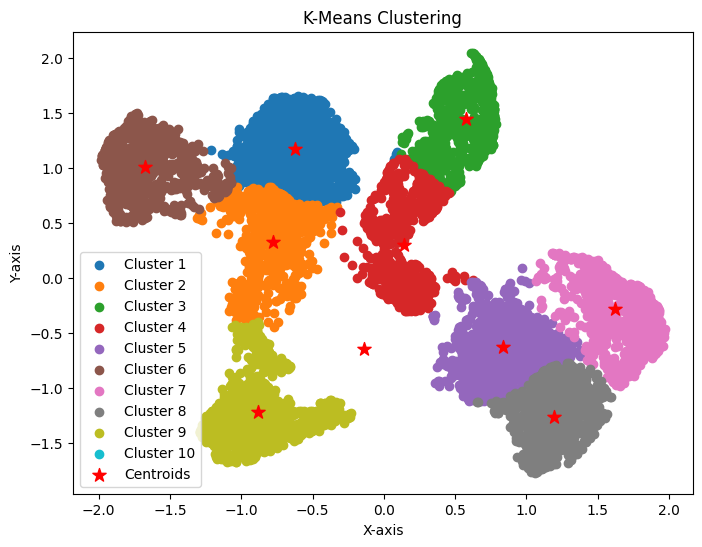

Cluster labels saved to 'cluster_labels.txt'
For k=2, Silhouette Score: 0.48592931032180786
For k=4, Silhouette Score: 0.4995192587375641
For k=6, Silhouette Score: 0.4280388057231903
For k=8, Silhouette Score: 0.46458369493484497
For k=10, Silhouette Score: 0.45264020562171936
For k=12, Silhouette Score: 0.4719383418560028
For k=14, Silhouette Score: 0.4696527421474457
For k=16, Silhouette Score: 0.4736866056919098
For k=18, Silhouette Score: 0.4186602234840393
For k=20, Silhouette Score: 0.4203377664089203


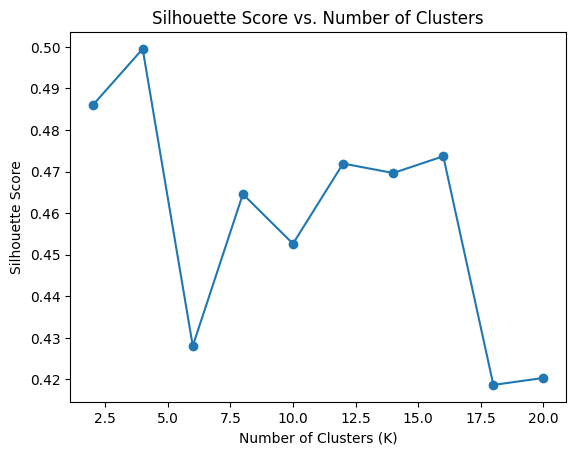

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Define the Euclidean distance function as a standalone function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

import numpy as np

def cosine_similarity(vec1, vec2):
    # Calculate the dot product of the two vectors
    dot_product = np.dot(vec1, vec2)

    # Calculate the L2 (Euclidean) norms of the vectors
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    # Calculate the cosine similarity
    similarity = dot_product / (norm_vec1 * norm_vec2)

    return similarity

def cosine_distance(vec1, vec2):
    # Calculate the cosine similarity
    similarity = cosine_similarity(vec1, vec2)

    # Calculate the cosine distance (1 - cosine similarity)
    distance = 1 - similarity

    return distance



def k_means_clustering(data, k, max_iters=100):
    # Randomly initialize cluster centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.array([[manhattan_distance(data_point, centroids[i]) for i in range(k)] for data_point in data])
        labels = np.argmin(distances, axis=1)

        # Update cluster centroids based on assigned data points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
        #labels = labels + 1

    return new_centroids, labels

def plot_silhouette_scores(data, max_k=20, step=2):
    silhouette_scores = []

    for k in range(2, max_k+1, step):
        centroids, labels = k_means_clustering(data, k)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For k={k}, Silhouette Score: {silhouette_avg}")

    plt.plot(range(2, max_k+1, step), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load and preprocess your data (replace this with your own data loading code)
    # data = df_transformed.to_numpy()
    data = prep_df.to_numpy()
    k = 10
    centroids, labels = k_means_clustering(data, k)
    print("Final cluster centroids:")
    print(centroids)
    print("Labels for data points:")
    print(labels)
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(data[labels == i+1, 0], data[labels == i+1, 1], label=f'Cluster {i+1}')

    # Plot cluster centroids as red stars
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering')
    plt.legend()

    plt.show()

    with open("cluster_labels.txt", "w") as file:
        for i, label in enumerate(labels):
            file.write(f"{label+1}\n")

    print("Cluster labels saved to 'cluster_labels.txt'")

plot_silhouette_scores(data, max_k=20, step=2)